In [1]:
%cd "drive/MyDrive/DataQuest/dataset/"

/content/drive/MyDrive/DataQuest/dataset


In [2]:
import pandas as pd
laptops = pd.read_csv('laptops.csv', encoding='Latin-1')
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [3]:
def clean(col):
  col = col.strip()
  col = col.replace('Operating System', 'os')
  col = col.replace(' ','_')
  col = col.replace('(','')
  col = col.replace(')','')
  col = col.lower()
  return col

new_columns = []
for column in laptops.columns:
  column = clean(column)
  new_columns.append(column)
laptops.columns = new_columns

In [4]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [5]:
laptops['ram'] = laptops['ram'].str.replace("GB","")
unique_ram = laptops['ram'].unique()
unique_ram

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

In [6]:
laptops["ram"] = laptops["ram"].str.replace('GB','')
laptops["ram"] = laptops["ram"].astype(int)
dtypes = laptops.dtypes

In [7]:
laptops.rename({"ram":"ram_gb"},axis=1,inplace=True)
ram_gb_desc = laptops["ram_gb"].describe()

In [8]:
laptops["gpu_manufacturer"] = (laptops["gpu"].str.split().str[0])
laptops["cpu_manufacturer"] = (laptops["cpu"].str.split().str[0])
cpu_manufacturer_counts = laptops["cpu_manufacturer"].value_counts()

In [9]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}

laptops["os"] = laptops["os"].map(mapping_dict)

In [10]:
laptops_no_null_rows = laptops.dropna(axis=0)
laptops_no_null_cols = laptops.dropna(axis=1)

In [11]:
value_counts_before = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()
laptops.loc[laptops["os"] == "macOS", "os_version"] = "X"
laptops.loc[laptops['os']=='No OS','os_version'] = 'Version Unknown'
value_counts_after = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()

In [12]:
laptops["weight"] = laptops["weight"].str.replace("kgs","").str.replace("kg","").astype(float)
laptops.rename({'weight':'weight_kg'},axis=1,inplace=True)
#laptops.to_csv('laptops_cleaned.csv',index=False)

In [13]:
import pandas as pd
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

In [ ]:
happiness2015.head(5)

In [15]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
mean_happiness = {}
region_name = happiness2015['Region'].unique()
for region in region_name:
  region_group = happiness2015.loc[happiness2015['Region']==region,:]
  region_mean = region_group['Happiness Score'].mean()
  mean_happiness[region] = region_mean
mean_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

In [ ]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')
aus_nz

In [ ]:
grouped = happiness2015.groupby('Region')
means = grouped.mean()
means

In [19]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean 

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [20]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [21]:
def dif(group):
  return (group.max() - group.mean())
mean_max_dif = happy_grouped.agg(dif)
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

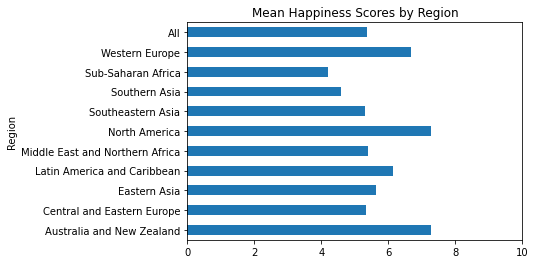

In [22]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)

In [23]:
world_mean_happiness = happiness2015["Happiness Score"].mean()
world_mean_happiness

5.3757341772151905

In [24]:
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
happy_family_stats

Happiness Score         ...   Family          
                                           amin   amax  ...     amax      mean
Region                                                  ...                   
Australia and New Zealand                 7.284  7.286  ...  1.31967  1.314450
Central and Eastern Europe                4.218  6.505  ...  1.34043  1.053042
Eastern Asia                              4.874  6.298  ...  1.30060  1.099427
Latin America and Caribbean               4.518  7.226  ...  1.30477  1.104720
Middle East and Northern Africa           3.006  7.278  ...  1.22393  0.920490
North America                             7.119  7.427  ...  1.32261  1.284860
Southeastern Asia                         3.819  6.798  ...  1.26504  0.940468
Southern Asia                             3.575  5.253  ...  1.10395  0.645321
Sub-Saharan Africa                        2.839  5.477  ...  1.18468  0.809085
Western Europe                            4.857  7.587  ...  1.40223  1.247302

[10 rows x 6 columns]

In [25]:
pv_happy_family_stats = happiness2015.pivot_table(values=['Happiness Score','Family'], index='Region', aggfunc=[np.min, np.max, np.mean], margins=True)
pv_happy_family_stats

amin  ...            mean
                                  Family  ... Happiness Score
Region                                    ...                
Australia and New Zealand        1.30923  ...        7.285000
Central and Eastern Europe       0.38562  ...        5.332931
Eastern Asia                     0.94675  ...        5.626167
Latin America and Caribbean      0.74302  ...        6.144682
Middle East and Northern Africa  0.47489  ...        5.406900
North America                    1.24711  ...        7.273000
Southeastern Asia                0.62736  ...        5.317444
Southern Asia                    0.30285  ...        4.580857
Sub-Saharan Africa               0.00000  ...        4.202800
Western Europe                   0.89318  ...        6.689619
All                              0.00000  ...        5.375734

[11 rows x 6 columns]

In [26]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [27]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_update_index = pd.concat([head_2015,head_2016],axis=0,ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


In [28]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on="Country", how="left", suffixes=('_2015','_2016'), left_index=True, right_index=True)
merged

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,3,2016
3,Norway,4,2015,4,2016
4,Canada,5,2015,5,2016


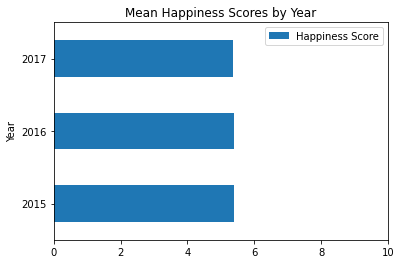

In [29]:
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015,happiness2016,happiness2017], axis=0)
pivot_table_combined = combined.pivot_table(values='Happiness Score', index='Year', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh',title='Mean Happiness Scores by Year', xlim=(0,10))

In [30]:
mapping = {'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'Health', 'Trust (Government Corruption)':'Trust'}
happiness2015 = happiness2015.rename(mapping, axis=1)

In [31]:
def label(element,x=1.0):
  if element > x:
    return 'High'
  else:
    return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label,x=0.8)
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low


In [32]:
def v_counts(col):
  num = col.value_counts()
  den = col.size
  return num/den
factors_impact = factors_impact.apply(v_counts)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [33]:
def percentages(col):
  div = col/happiness2015['Happiness Score']
  return div * 100
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170
...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706


In [34]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score']*100,2)
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


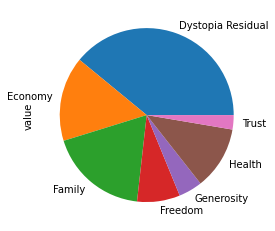

In [35]:
pv_melt = melt.pivot_table(index="variable",values="value")
pv_melt.plot(kind='pie', y='value', legend=False)

In [ ]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)
merged

In [37]:
def extract_last_word(element):
  return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head()) 

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


In [38]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

In [39]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
print(national_accounts.head())

0    False
1    False
2    False
3    False
4     True
Name: SpecialNotes, dtype: bool


In [40]:
pattern = r"([0-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [41]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged["IESurvey"].str.extractall(pattern)
value_counts = years['Years'].value_counts()
value_counts

2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
1995     1
1992     1
2003     1
2002     1
2006     1
2000     1
1998     1
1999     1
Name: Years, dtype: int64

In [42]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year+years['Second_Year']

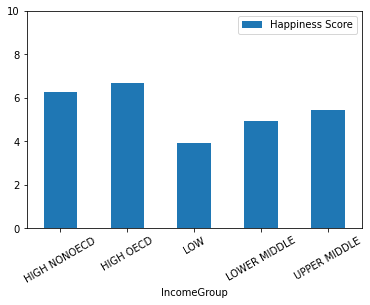

In [43]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income','').str.replace(':','').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score',index='IncomeGroup')
pv_incomes.plot(kind='bar',rot=30,ylim=(0,10))

In [44]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [45]:
happiness2017.columns = happiness2017.columns.str.replace('.',' ').str.replace('\s+',' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()
combined = pd.concat([happiness2015,happiness2016,happiness2017],ignore_index=True)
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         155
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
STANDARD ERROR                 312
ECONOMY                        312
FAMILY                           0
HEALTH                         312
FREEDOM                          0
TRUST                          312
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
LOWER CONFIDENCE INTERVAL      313
UPPER CONFIDENCE INTERVAL      313
ECONOMY GDP PER CAPITA         158
HEALTH LIFE EXPECTANCY         158
TRUST GOVERNMENT CORRUPTION    158
WHISKER HIGH                   315
WHISKER LOW                    315
dtype: int64

In [46]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()
missing

155

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY','YEAR'])
combined[dups]

In [48]:
combined = combined.drop_duplicates(['COUNTRY','YEAR'])

In [49]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop,axis=1)
missing = combined.isnull().sum()

In [50]:
combined = combined.dropna(thresh=159,axis=1)
missing = combined.isnull().sum()

In [51]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'])

5.370727659882893
0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
465    3.471
466    3.462
467    3.349
468    2.905
469    2.693
Name: HAPPINESS SCORE UPDATED, Length: 470, dtype: float64


In [52]:
combined = combined.dropna()
missing = combined.isnull().sum()

In [53]:
import pandas as pd
hn = pd.read_csv("hacker_news.csv")

In [54]:
import re
pattern = "[Pp]ython"
titles = hn['title']
python_mentions = titles.str.contains(pattern).sum()

In [55]:
titles = hn['title']
ruby_titles = titles[titles.str.contains("[Rr]uby")]

In [56]:
email_bool = titles.str.contains("e-?mail")
email_count = email_bool.sum()
email_titles = titles[email_bool]

In [57]:
pattern = "\[\w+\]"
tag_titles = titles[titles.str.contains(pattern)]
tag_count = tag_titles.shape[0]

In [58]:
pattern = r"\[(\w+)\]"
tag_freq = titles.str.extract(pattern).value_counts()
tag_freq

pdf            276
video          111
2015             3
audio            3
2014             2
slides           2
beta             2
viz              1
German           1
Petition         1
NSFW             1
Map              1
Live             1
JavaScript       1
Infograph        1
HBR              1
Challenge        1
GOST             1
Excerpt          1
React            1
CSS              1
Beta             1
Benchmark        1
Australian       1
ANNOUNCE         1
5                1
2008             1
Python           1
SpaceX           1
SPA              1
gif              1
updated          1
transcript       1
survey           1
song             1
satire           1
repost           1
png              1
much             1
map              1
detainee         1
Skinnywhale      1
crash            1
comic            1
coffee           1
blank            1
ask              1
Videos           1
Ubuntu           1
USA              1
videos           1
1996             1
dtype: int64

In [59]:
def first_10_matches(pattern):
  all_matches = titles[titles.str.contains(pattern)]
  first_10 = all_matches.head(10)
  return first_10
pattern = r"[Jj]ava[^Ss]"
java_titles = titles[titles.str.contains(pattern)]

In [60]:
pattern = r"\b[Jj]ava\b"
java_titles = titles[titles.str.contains(pattern)]

In [61]:
beginning_count = titles.str.contains(r"^\[\w+\]").sum()
ending_count = titles.str.contains(r"\[\w+\]$").sum()

In [62]:
import re
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])
pattern = r"\be[\-\s]?mails?\b"
email_mentions = titles.str.contains(pattern, flags=re.I).sum()

In [63]:
import pandas as pd
import re

hn = pd.read_csv("hacker_news.csv")
titles = hn['title']
pattern = "[Ss][Qq][Ll]"
sql_counts = titles.str.contains(pattern).sum()

In [64]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql["flavor"]  = hn_sql["title"].str.extract(r"(\w+SQL)",flags=re.I)
hn_sql["flavor"] = hn_sql["flavor"].str.lower()
sql_pivot = hn_sql.pivot_table(index="flavor",values="num_comments",aggfunc='mean')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [65]:
pattern = r"[Pp]ython[\s]([\d\.]+)"
py_versions = titles.str.extract(pattern)
py_versions_freq = dict(py_versions.value_counts())
py_versions_freq

{('1.5',): 1,
 ('2',): 3,
 ('2.7',): 1,
 ('3',): 10,
 ('3.5',): 3,
 ('3.5.0',): 1,
 ('3.6',): 2,
 ('4',): 1,
 ('8',): 1}

In [66]:
def first_10_matches(pattern):
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Cc]\b[^.+]"
first_ten = first_10_matches(pattern)

In [67]:
pattern = r"(?<!Series\s)\b[Cc]\b(?![\+\.])"
c_mentions = titles.str.contains(pattern).sum()

In [68]:
pattern = r"\b(\w+)\s\1\b"
repeated_words = titles[titles.str.contains(pattern)]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [69]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])
email_uniform = email_variations.str.replace(r"e[\-\s]?mail","email",flags=re.I)
titles_clean = titles.str.replace(r"e[\-\s]?mail","email",flags=re.I)

In [70]:
pattern = r"https?://([\w\-\.]+)"
domains = hn['url'].str.extract(pattern,flags=re.I)
top_domains = domains.value_counts().head(5)
top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
dtype: int64

In [71]:
pattern = r"(https?)://([\w\.\-]+)/?(.*)"
url_parts = hn["url"].str.extract(pattern,flags=re.I)

In [72]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"
url_parts = hn['url'].str.extract(pattern, flags=re.I)

In [73]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [74]:
killed_cols = [col for col in mvc.columns if "killed" in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [75]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured["total_injured"].mask(injured["total_injured"].isnull(),injured_manual_sum)
injured['total_injured'] = injured["total_injured"].mask(injured["total_injured"]!=injured_manual_sum,np.nan)

In [76]:
mvc["total_injured"] = injured["total_injured"]
mvc["total_killed"] = killed["total_killed"]

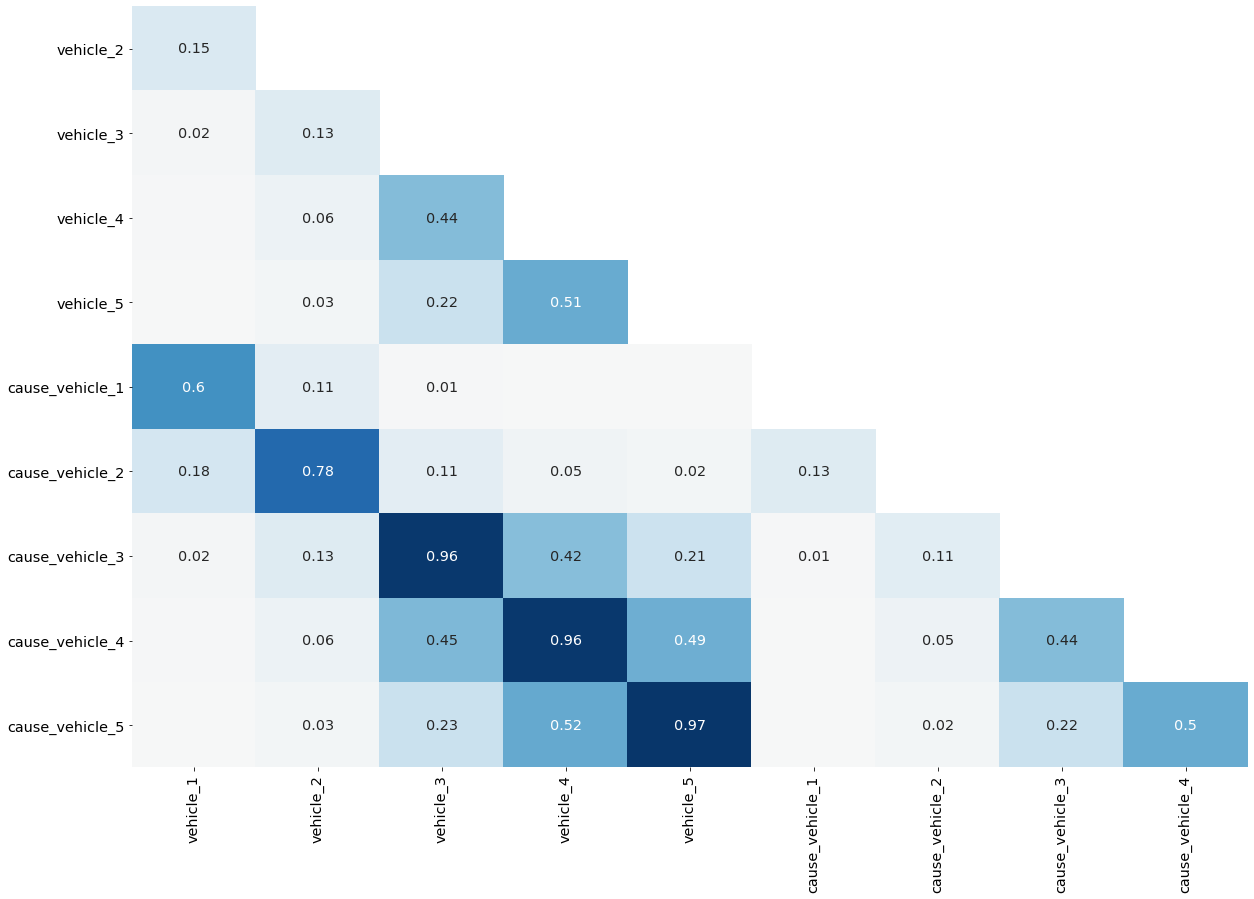

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()

veh_cols = [col for col in mvc.columns if "vehicle" in col]
plot_null_correlations(mvc[veh_cols])

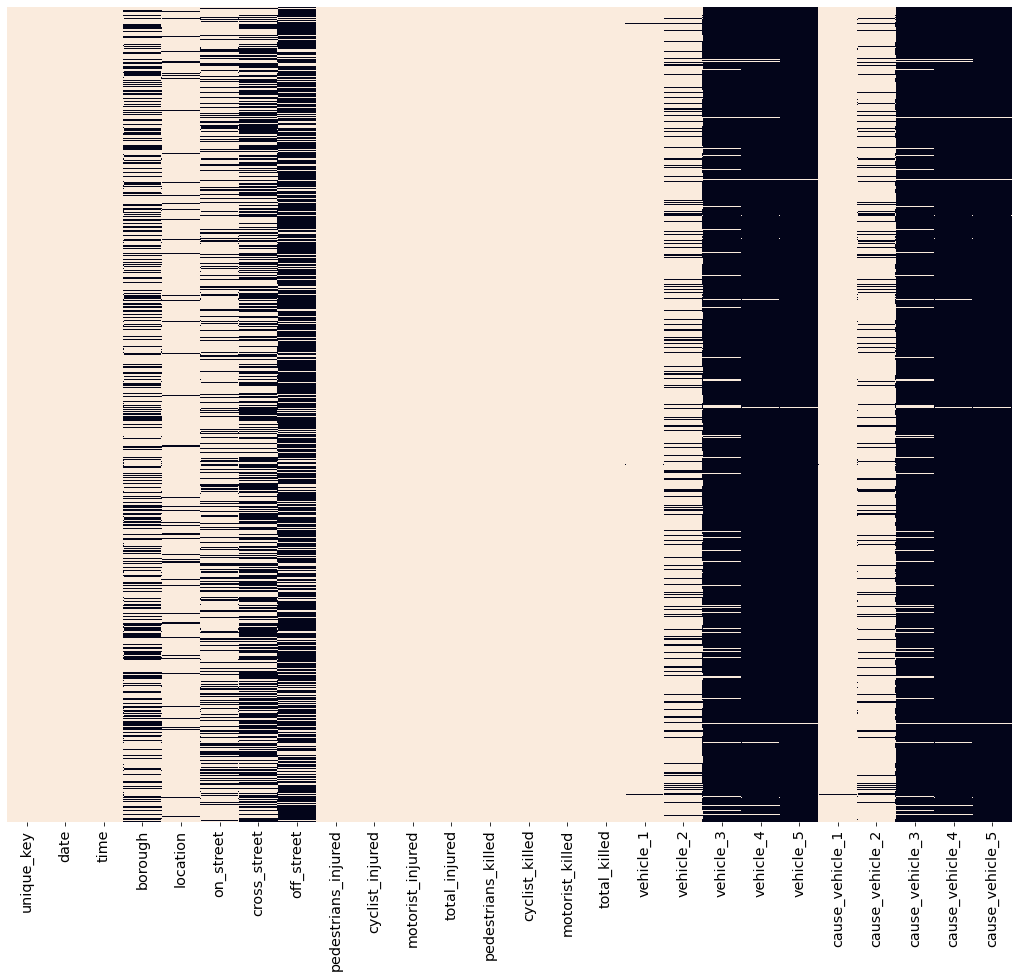

In [78]:
def plot_null_matrix(df, figsize=(18,15)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

plot_null_matrix(mvc)

In [79]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v,v_null,c_null])
    
vc_null_df = pd.DataFrame(vc_null_data,columns=col_labels)
vc_null_data

[[1, 204, 24], [2, 3793, 223], [3, 242, 24], [4, 50, 3], [5, 10, 0]]

In [80]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)

In [81]:
def summarize_missing():
    v_missing_data = []
    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)
        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
        v_missing_data.append([v, v_missing, c_missing])
    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
summary_before 

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [82]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_missing_mask,"Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask,"Unspecified")

summary_after = summarize_missing()

In [83]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [84]:
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(),sup_data[col])

null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64